In [3]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


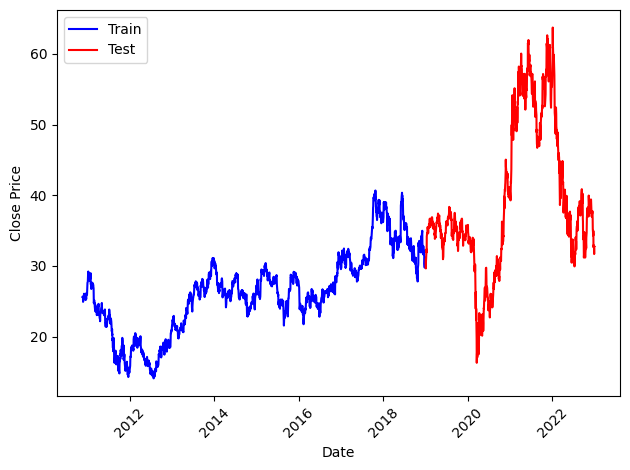

In [4]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
period ="train"
data = Data('GM',start_date,end_date,period,2019)
data.data_preprocess()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define parameter ranges (adjust based on your domain knowledge)
crossover_rates = [0.6, 0.8, 0.95]
mutation_rates = [0.01, 0.1, 0.3]
inversion_rates = [0.0, 0.05, 0.1]  # assuming inversion is another operator you tune

num_runs = 10  # number of independent runs per config

# Store results
results = []

for r_cross in crossover_rates:
    for r_mut in mutation_rates:
        for r_inv in inversion_rates:
            for run in range(num_runs):
                ga = IslandGGA(
                    data=data.train_data,
                    K=4,
                    num_islands=10,
                    m_iter=5,
                    num_iter=10,
                    pSize=20,
                    r_cross=r_cross,
                    r_mut=r_mut,
                    r_inv=r_inv,  # make sure your IslandGGA accepts this param
                    strategies=data.strategies,
                    evolve_strategy='ring'  # or whichever you want to test here
                )
                ga.evolve()
                final_score = ga.convergence_times[-1]  # or use an evaluation function
                
                results.append({
                    'r_cross': r_cross,
                    'r_mut': r_mut,
                    'r_inv': r_inv,
                    'run': run,
                    'final_score': final_score
                })

# Convert results to DataFrame
df_results = pd.DataFrame(results)
df_results.to_csv("parameter_effect_analysis.csv", index=False)
